# GoldHamster Label Statistics

Label Statistics:
unique_pmids: 1436
none: 25
immortal_cell_line: 104
in_vivo: 409
human: 224
other: 234
primary_cells: 94
in_silico: 157
organs: 161
invertebrate: 212


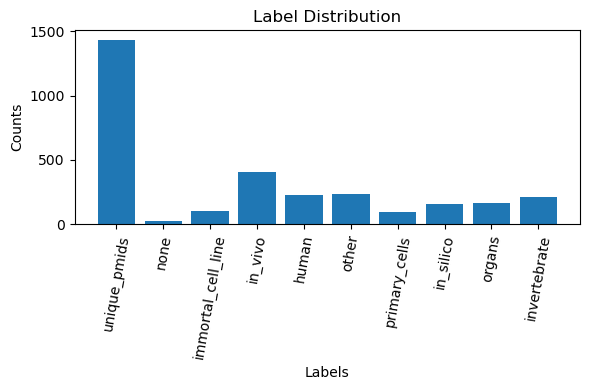

In [4]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Paths to the directories
LABELS_DIR = Path("../data/goldhamster/labels")

# Function to analyze label files
def analyze_labels(labels_dir):
    label_counts = Counter()
    pmids = set()
    for file in labels_dir.glob("*.txt"):
        with open(file, "r") as f:
            for line in f:
                # label_counts["pmids"] += 1  # Count the number of lines (pmid)
                if line.strip():
                    pmid = line.strip().split("\t")[0]
                    if pmid not in pmids:
                        label_counts["unique_pmids"] += 1
                        labels = line.strip().split("\t")[1]  # Second column contains labels
                        for label in labels.split(","):
                            label_counts[label] += 1
                    pmids.add(pmid)
    return label_counts

# Analyze labels
label_stats = analyze_labels(LABELS_DIR)
print("Label Statistics:")
for label, count in label_stats.items():
    print(f"{label}: {count}")

plt.figure(figsize=(6, 4))
# Plotting the label distribution
plt.bar(label_stats.keys(), label_stats.values())
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.title("Label Distribution")
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

# GoldHamster Title, Abstract, and MeSH Statistics


Paper Metadata Statistics:

Titles:
  N/A: 1
  empty: 13
  valid: 1422
  lengths: Mean=110.5379746835443, Max=257, Min=2

Abstracts:
  N/A: 1
  empty: 0
  valid: 1435
  lengths: Mean=1499.8146341463414, Max=3516, Min=55

Mesh_terms:
  N/A: 15
  empty: 0
  valid: 1421
  lengths: Mean=226.58128078817734, Max=635, Min=29


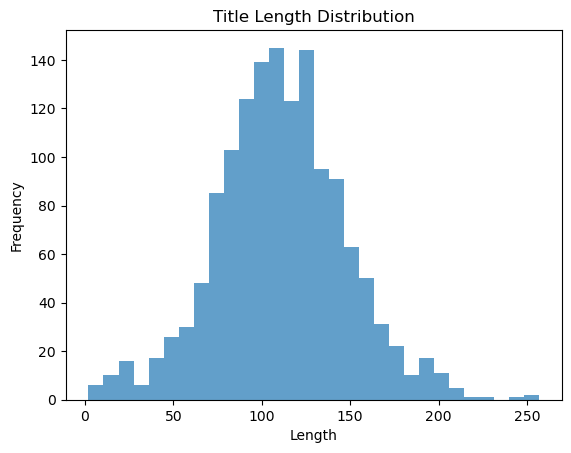

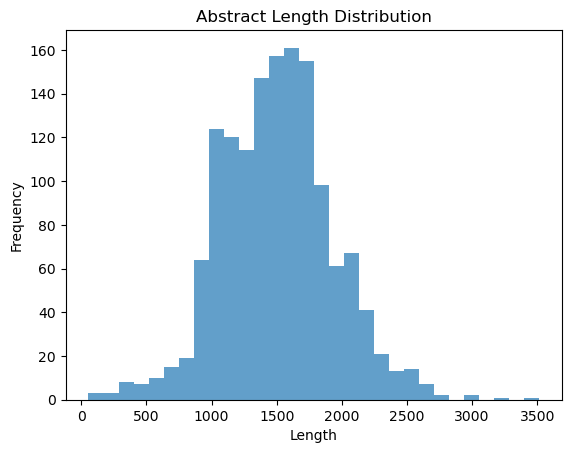

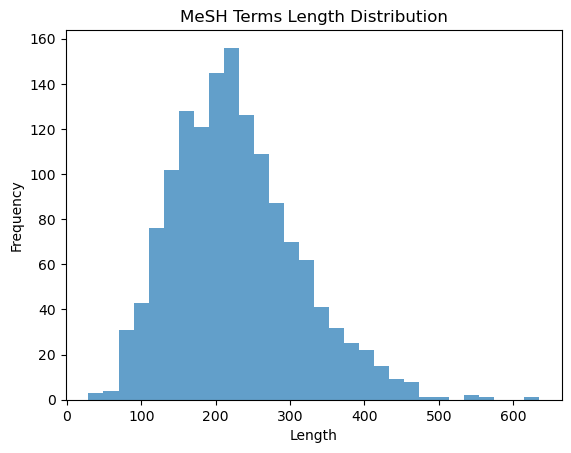

In [5]:
import json

PAPERS_DIR = Path("../data/goldhamster/docs")

# Function to analyze paper metadata files
def analyze_papers(papers_dir):
    stats = {"titles": {"N/A": 0, "empty": 0, "valid": 0, "lengths": []},
             "abstracts": {"N/A": 0, "empty": 0, "valid": 0, "lengths": []},
             "mesh_terms": {"N/A": 0, "empty": 0, "valid": 0, "lengths": []}}
    
    for file in papers_dir.glob("*.json"):
        doc_dict = json.loads(file.read_text())
        title = doc_dict.get("title", "N/A")
        abstract = doc_dict.get("abstract", "N/A")
        mesh = doc_dict.get("mesh_terms", "N/A")
        
        # Analyze titles
        if title == "N/A":
            stats["titles"]["N/A"] += 1
        elif not title.strip():
            stats["titles"]["empty"] += 1
        else:
            stats["titles"]["valid"] += 1
            stats["titles"]["lengths"].append(len(title))
        
        # Analyze abstracts
        if abstract == "N/A":
            stats["abstracts"]["N/A"] += 1
        elif not abstract.strip():
            stats["abstracts"]["empty"] += 1
        else:
            stats["abstracts"]["valid"] += 1
            stats["abstracts"]["lengths"].append(len(abstract))
        
        # Analyze MeSH terms
        if mesh == "N/A":
            stats["mesh_terms"]["N/A"] += 1
        elif not mesh.strip():
            stats["mesh_terms"]["empty"] += 1
        else:
            stats["mesh_terms"]["valid"] += 1
            stats["mesh_terms"]["lengths"].append(len(mesh))
    
    return stats

# Analyze papers
paper_stats = analyze_papers(PAPERS_DIR)
print("\nPaper Metadata Statistics:")
for key, value in paper_stats.items():
    print(f"\n{key.capitalize()}:")
    for subkey, subvalue in value.items():
        if subkey == "lengths":
            print(f"  {subkey}: Mean={sum(subvalue)/len(subvalue) if subvalue else 0}, Max={max(subvalue, default=0)}, Min={min(subvalue, default=0)}")
        else:
            print(f"  {subkey}: {subvalue}")

# Plot text length distributions
def plot_length_distribution(lengths, title):
    plt.hist(lengths, bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel("Length")
    plt.ylabel("Frequency")
    plt.show()

plot_length_distribution(paper_stats["titles"]["lengths"], "Title Length Distribution")
plot_length_distribution(paper_stats["abstracts"]["lengths"], "Abstract Length Distribution")
plot_length_distribution(paper_stats["mesh_terms"]["lengths"], "MeSH Terms Length Distribution")

# Get all pmids in labels without downloaded paper

In [6]:
def get_pmids_from_labels(labels_dir: Path) -> set:
    """Extract all PMIDs from the label files."""
    pmids = set()
    for file in labels_dir.glob("*.txt"):
        with open(file, "r") as f:
            for line in f:
                if line.strip():
                    pmid = line.strip().split("\t")[0]  # First column is the PMID
                    pmids.add(pmid)
    return pmids

def get_existing_paper_pmids(papers_dir: Path) -> set:
    """Get all PMIDs that have a corresponding paper file."""
    return {file.stem for file in papers_dir.glob("*.json")}

label_pmids = get_pmids_from_labels(LABELS_DIR)
paper_pmids = get_existing_paper_pmids(PAPERS_DIR)
print(f"Found {len(label_pmids)} PMIDs in label files.")
print(f"Found {len(paper_pmids)} PMIDs in paper files.")

missing_pmids = label_pmids - paper_pmids
print(f"Found {len(missing_pmids)} PMIDs without corresponding paper files.")
for pmid in missing_pmids:
    print(pmid)


Found 1436 PMIDs in label files.
Found 1436 PMIDs in paper files.
Found 0 PMIDs without corresponding paper files.


# Check if there are overlapping PMID's in train_full and test_full

In [8]:
for split in ["_full", "0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]:
    print(f"\nAnalyzing split {split}...")
    train_labels = pd.read_csv(
        LABELS_DIR / f"train{split}.txt", sep="\t", header=None,
        names=["pmid", "labels"], dtype={"pmid": int, "labels": str}
    )
    test_labels = pd.read_csv(
        LABELS_DIR / f"test{split}.txt", sep="\t", header=None,
        names=["pmid", "labels"], dtype={"pmid": int, "labels": str}
    )
    
    print(f"Unique train label PMIDs for split {split}: {len(train_labels['pmid'].unique())}")
    print(f"Unique test label PMIDs for split {split}: {len(test_labels['pmid'].unique())}")
    print(f"Overlap between train and test PMIDs for split {split}: {len(set(train_labels['pmid']) & set(test_labels['pmid']))}")
    print("-" * 40)


Analyzing split _full...
Unique train label PMIDs for split _full: 1436
Unique test label PMIDs for split _full: 714
Overlap between train and test PMIDs for split _full: 714
----------------------------------------

Analyzing split 0...
Unique train label PMIDs for split 0: 1292
Unique test label PMIDs for split 0: 71
Overlap between train and test PMIDs for split 0: 0
----------------------------------------

Analyzing split 1...
Unique train label PMIDs for split 1: 1298
Unique test label PMIDs for split 1: 70
Overlap between train and test PMIDs for split 1: 0
----------------------------------------

Analyzing split 2...
Unique train label PMIDs for split 2: 1291
Unique test label PMIDs for split 2: 70
Overlap between train and test PMIDs for split 2: 0
----------------------------------------

Analyzing split 3...
Unique train label PMIDs for split 3: 1294
Unique test label PMIDs for split 3: 71
Overlap between train and test PMIDs for split 3: 0
--------------------------------